# ZFP57 meth ratio (1kb)

In [1]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [2]:
%%bash
cd ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Sequence/ZFP57Frequency_1kb/methCpG
# /mnt/Storage/home/wangyiman/bin/utilities/fastaRegexFinder.py -f /mnt/Storage/home/yanghui/annotations/mm10/mm10.fa -r 'TGCCGC' > ZFP57_TGCCGC.bed


Processing chr1
Processing chr10
Processing chr11
Processing chr12
Processing chr13
Processing chr14
Processing chr15
Processing chr16
Processing chr17
Processing chr18
Processing chr19
Processing chr1_GL456210_random
Processing chr1_GL456211_random
Processing chr1_GL456212_random
Processing chr1_GL456213_random
Processing chr1_GL456221_random
Processing chr2
Processing chr3
Processing chr4
Processing chr4_GL456216_random
Processing chr4_JH584292_random
Processing chr4_GL456350_random
Processing chr4_JH584293_random
Processing chr4_JH584294_random
Processing chr4_JH584295_random
Processing chr5
Processing chr5_JH584296_random
Processing chr5_JH584297_random
Processing chr5_JH584298_random
Processing chr5_GL456354_random
Processing chr5_JH584299_random
Processing chr6
Processing chr7
Processing chr7_GL456219_random
Processing chr8
Processing chr9
Processing chrM
Processing chrX
Processing chrX_GL456233_random
Processing chrY
Processing chrY_JH584300_random
Processing chrY_JH584301_rando

In [4]:
%%bash
cd ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Sequence/ZFP57Frequency_1kb/methCpG
### universal CHM
# for process in Universal;do
#     awk -v XVALUE=${process} 'BEGIN{FS=OFS="\t"}{print $0, XVALUE"CHM1kbBin_"NR}' ../../${process}.CHM.30CpG1kb.bed | bedtools intersect -wao -a - -b ../../${process}.CHMnum.bed | awk 'BEGIN{FS=OFS="\t"}{print $1,$2,$3,$4,$8}' | bedtools intersect -f 1 -a ZFP57_TGCCGC.bed -b - -wa -wb > ZFP57_${process}CHM1kb.bed
# done

### process complementary CHM
for process in EarlyEmbryogenesis PGCsDevelopment Spermatogenesis RetinalDevelopment HeartDevelopment LiverDevelopment Universal;do
    awk -v XVALUE=${process} 'BEGIN{FS=OFS="\t"}{print $0, XVALUE"CHM1kbBin_"NR}' ../../${process}.ComplementCHM.30CpG1kb.bed | bedtools intersect -wao -a - -b ../../${process}Complement.CHMnum.bed | awk 'BEGIN{FS=OFS="\t"}{print $1,$2,$3,$4,$8}' | bedtools intersect -f 1 -a ZFP57_TGCCGC.bed -b - -wa -wb > ZFP57_${process}ComplementCHM1kb.bed
done


### nonCHM CpG-rich
# awk 'BEGIN{FS=OFS="\t"}{print $0, "nonCHM_"NR}' /mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Sequence/NonCHMsCpGrich.bed | bedtools intersect -f 1 -a ZFP57_TGCCGC.bed -b - -wa -wb > ZFP57_nonCHM.bed


In [7]:
%%bash
### universal and nonCHM and process-specific
cd ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Sequence/ZFP57Frequency_1kb/methCpG
# mkdir -p universalCHM
# mkdir -p nonCHM
mkdir -p universalComplementCHM

meth_ratio(){
    process=$1
    stages=$2
    for stage in $stages;do
        # bedtools intersect -wa -wb -a ZFP57_universalCHM1kb.bed -b ~/CHMsInOtherContexts/CellStateTransition/${process}/PreparedBeforeCallCHM/${stage}.methyl.sam.G.merged.bed > universalCHM/UniversalCHM1kb_ZFP57_${process}_${stage}_methRatio.bed
        # bedtools intersect -wa -wb -a ZFP57_nonCHM.bed       -b ~/CHMsInOtherContexts/CellStateTransition/${process}/PreparedBeforeCallCHM/${stage}.methyl.sam.G.merged.bed > nonCHM/nonCHM_ZFP57_${process}_${stage}_methRatio.bed
        bedtools intersect -wa -wb -a ZFP57_UniversalComplementCHM1kb.bed -b ~/CHMsInOtherContexts/CellStateTransition/${process}/PreparedBeforeCallCHM/${stage}.methyl.sam.G.merged.bed > universalComplementCHM/UniversalComplementCHM1kb_ZFP57_${process}_${stage}_methRatio.bed
    done
}
meth_ratio EarlyEmbryogenesis "2cell 8cell Morula ICM"
meth_ratio PGCsDevelopment "E10.5 E13.5_female E13.5_male"
meth_ratio Spermatogenesis "US DS PS RS"
meth_ratio RetinalDevelopment "E14.5 E17.5 P0 P3 P7 P10 P14 P21"
meth_ratio HeartDevelopment "E10.5 E11.5 E12.5 E13.5 E14.5 E15.5 E16.5 P0"
meth_ratio LiverDevelopment "E11.5 E12.5 E13.5 E14.5 E15.5 E16.5 P0"


In [11]:
%%bash
### not used
# cd ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Sequence/ZFP57Frequency_1kb/methCpG

# meth_ratio(){
#     process=$1
#     stages=$2
#     for specificProcess in EarlyEmbryoSpecific SpermSpecific RetinalSpecific HeartSpecific LiverSpecific;do
#         mkdir -p ${specificProcess}CHM
#         for stage in $stages;do
#             bedtools intersect -wa -wb -b ZFP57_${specificProcess}CHM1kb.bed -a ProcessSpecificCHM/ProcessSpecificCHM1kb_ZFP57_${process}_${stage}_methRatio.bed | awk 'BEGIN{FS=OFS="\t"} {print $1,$2,$3,$4,$5,$6,$7,$8,$9,$10,$27,$28,$13,$14,$15,$16}' > ${specificProcess}CHM/${specificProcess}CHM1kb_ZFP57_${process}_${stage}_methRatio.bed
#         done
#     done
# }
# meth_ratio EarlyEmbryogenesis "2cell 8cell Morula ICM"
# meth_ratio PGCsDevelopment "E10.5 E13.5_female E13.5_male"
# meth_ratio Spermatogenesis "US DS PS RS"
# meth_ratio RetinalDevelopment "E14.5 E17.5 P0 P3 P7 P10 P14 P21"
# meth_ratio HeartDevelopment "E10.5 E11.5 E12.5 E13.5 E14.5 E15.5 E16.5 P0"
# meth_ratio LiverDevelopment "E11.5 E12.5 E13.5 E14.5 E15.5 E16.5 P0"


In [ ]:
### 为什么用-wao：舍弃了那些没有overlap到B的A，那些motif上的CpG不一定是没有被甲基化，而是有可能没有测到

In [12]:
stage_dict = {
    'EarlyEmbryogenesis': ['2cell','8cell','Morula','ICM',],
    'PGCsDevelopment': ['E10.5','E13.5_female','E13.5_male',],
    'Spermatogenesis': ['US','DS','PS','RS',],
    'RetinalDevelopment': ['E14.5','E17.5','P0','P3','P7','P10','P14','P21',],
    'HeartDevelopment': ['E10.5','E11.5','E12.5','E13.5','E14.5','E15.5','E16.5','P0',],
    'LiverDevelopment': ['E11.5','E12.5','E13.5','E14.5','E15.5','E16.5','P0']
}

In [13]:
meth_ratio_df = pd.DataFrame()

In [14]:
### not used

# for t in ['EarlyEmbryoSpecific', 'SpermSpecific', 'RetinalSpecific', 'HeartSpecific', 'LiverSpecific', 'ProcessSpecific'] :
#     os.chdir(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Sequence/ZFP57Frequency_1kb/methCpG/{t}CHM')
#     for process in stage_dict.keys() :
#         for stage in stage_dict[process] :
#             df = pd.read_csv(
#                 f'{t}CHM1kb_ZFP57_{process}_{stage}_methRatio.bed',
#                 sep = "\t",
#                 header = None,
#                 usecols = [3,10,11,15]
#                             )
#             df.columns = ['motif_num', 'name1_num', 'name2_num', 'meth_ratio']
#             df['name_num'] = df['name1_num'] + '.' + df['name2_num']
#             df['name'] = df['name_num'].str.split('_', expand = True)[0]
#             df['process_stage'] = f'{process}_{stage}'
#             df = df[['motif_num', 'name_num', 'meth_ratio', 'name', 'process_stage']]
#             meth_ratio_df = pd.concat([meth_ratio_df, df])
            
# meth_ratio_df     

In [15]:
fi_name_dict = {
    'universalCHM' : 'UniversalCHM1kb_ZFP57',
    'universalComplementCHM' : 'UniversalComplementCHM1kb_ZFP57',
    'nonCHM' : 'nonCHM_ZFP57',
}

for t in ['universalCHM', 'universalComplementCHM'] :
    os.chdir(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Sequence/ZFP57Frequency_1kb/methCpG/{t}')
    for process in stage_dict.keys() :
        for stage in stage_dict[process] :
            df = pd.read_csv(
                f'{fi_name_dict[t]}_{process}_{stage}_methRatio.bed',
                sep = "\t",
                header = None,
                usecols = [3,10,11,15]
                            )
            df.columns = ['motif_num', 'name1_num', 'name2_num', 'meth_ratio']
            df['name_num'] = df['name1_num'] + '.' + df['name2_num']
            df['name'] = df['name_num'].str.split('_', expand = True)[0]
            df['process_stage'] = f'{process}_{stage}'
            df = df[['motif_num', 'name_num', 'meth_ratio', 'name', 'process_stage']]
            
            meth_ratio_df = pd.concat([meth_ratio_df, df])

In [16]:
for t in ['nonCHM'] :
    os.chdir(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Sequence/ZFP57Frequency_1kb/methCpG/{t}')
    for process in stage_dict.keys() :
        for stage in stage_dict[process] :
            df = pd.read_csv(
                f'{fi_name_dict[t]}_{process}_{stage}_methRatio.bed',
                sep = "\t",
                header = None,
                usecols = [3,10,14]
                            )
            df.columns = ['motif_num', 'name_num', 'meth_ratio']
            df['name'] = df['name_num'].str.split('_', expand = True)[0]
            df['process_stage'] = f'{process}_{stage}'
            meth_ratio_df = pd.concat([meth_ratio_df, df])
            
meth_ratio_df

,motif_num,name_num,meth_ratio,name,process_stage
0,chr1_4557034_4557040_rev,UniversalCHM1kbBin_1.Universal_1,0.889,UniversalCHM1kbBin,EarlyEmbryogenesis_2cell
1,chr1_4557686_4557692_for,UniversalCHM1kbBin_1.Universal_1,0.800,UniversalCHM1kbBin,EarlyEmbryogenesis_2cell
2,chr1_5809156_5809162_rev,UniversalCHM1kbBin_3.Universal_5,0.667,UniversalCHM1kbBin,EarlyEmbryogenesis_2cell
3,chr1_6168398_6168404_for,UniversalCHM1kbBin_5.Universal_6,0.733,UniversalCHM1kbBin,EarlyEmbryogenesis_2cell
4,chr1_6435184_6435190_rev,UniversalCHM1kbBin_6.Universal_7,0.857,UniversalCHM1kbBin,EarlyEmbryogenesis_2cell
...,...,...,...,...,...
14269,chr9_123259748_123259754_rev,nonCHM_22061,0.000,nonCHM,LiverDevelopment_P0
14270,chr9_123260380_123260386_for,nonCHM_22062,0.000,nonCHM,LiverDevelopment_P0
14271,chr9_123260496_123260502_rev,nonCHM_22062,0.000,nonCHM,LiverDevelopment_P0
14272,chr9_123478466_123478472_rev,nonCHM_22063,0.000,nonCHM,LiverDevelopment_P0


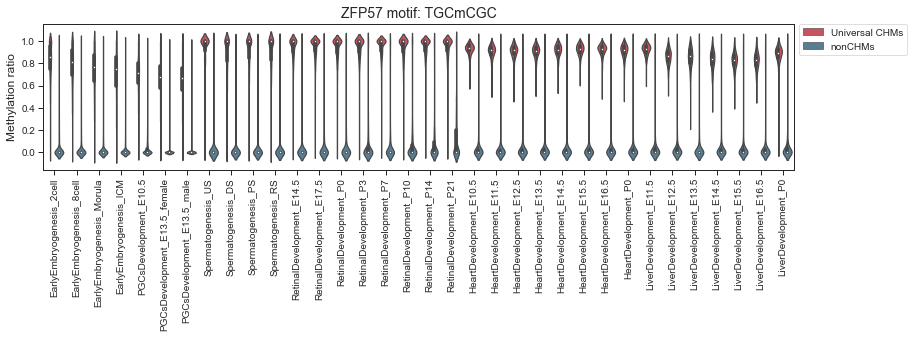

In [7]:
### not used
# with sns.axes_style('white', rc={
#         'xtick.bottom': True,
#         'ytick.left': True
# }), sns.plotting_context('paper',
#                          rc={
#                              'axes.titlesize': 14,
#                              'axes.labelsize': 12,
#                              'xtick.labelsize': 10,
#                              'ytick.labelsize': 10,
#                              'legend.fontsize': 10
#                          }):
#     fig, axes = plt.subplots(figsize = (6.4 * 2, 4.8 * 1), tight_layout = True)
#     for i,kmer in enumerate(['CpG']) :
#         ax = axes
#         sns.violinplot(data = meth_ratio_df,
#                        x = 'process_stage',
#                        y = 'meth_ratio',
#                        hue = 'name',
#                        ax = ax,
#                        palette = ['#DA404E', '#507F9B']
#                       )
#         ax.set_xticks(ax.get_xticks())
#         ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
#         ax.set_title(f'ZFP57 motif: TGCmCGC')
#         ax.set_ylabel("Methylation ratio")
#         ax.set_xlabel("")
# #         ax.set_ylim(0, 1)
#         h,l = ax.get_legend_handles_labels()
#         ax.legend(h, ['Universal CHMs', 'nonCHMs'], loc = 'lower left', title = "", bbox_to_anchor=(1, .75))

#     fig.savefig('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make10_violin_ZFP57_methRatio_1kb.pdf')
         

In [17]:
%%bash
cd ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Sequence/ZFP57Frequency_1kb/methCpG
### universal CHM
awk 'BEGIN{FS=OFS="\t"}{print $0, "UniversalCHM1kbBin_"NR}' ../../Universal.CHM.30CpG1kb.bed | bedtools intersect -wo -a - -b ../../Universal.CHMnum.bed | awk 'BEGIN{FS=OFS="\t"}{print $4"."$8}' > universalCHM1kbBinNum_universalCHMnum.txt
### universal complement CHM
awk 'BEGIN{FS=OFS="\t"}{print $0, "UniversalCHM1kbBin_"NR}' ../../Universal.ComplementCHM.30CpG1kb.bed | bedtools intersect -wo -a - -b ../../UniversalComplement.CHMnum.bed | awk 'BEGIN{FS=OFS="\t"}{print $4"."$8}' > universalComplementCHM1kbBinNum_universalComplementCHMnum.txt

### not used
# for process in EarlyEmbryoSpecific SpermSpecific RetinalSpecific HeartSpecific LiverSpecific ProcessSpecific;do
#     awk -v XVALUE=${process} 'BEGIN{FS=OFS="\t"}{print $0, XVALUE"CHM1kbBin_"NR}' ../../${process}.CHM.30CpG1kb.bed | bedtools intersect -wo -a - -b ../../${process}.CHMnum.bed | awk 'BEGIN{FS=OFS="\t"}{print $4"."$8}' > ${process}CHM1kbBinNum_${process}CHMnum.txt
# done

In [18]:
type_num_total_ls = []
for process in ['universal', 'universalComplement'] :
    type_num_total_ls += pd.read_csv(
        f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Sequence/ZFP57Frequency_1kb/methCpG/{process}CHM1kbBinNum_{process}CHMnum.txt',
        sep = "\t", header = None
    )[0].tolist()
    
type_num_total_df = pd.DataFrame()
type_num_total_df['name_num'] = type_num_total_ls + [f'nonCHM_{x}' for x in range(1, 22070)]
type_num_total_df['default_motif_num'] = 0
    
type_num_total_df

,name_num,default_motif_num
0,UniversalCHM1kbBin_1.Universal_1,0
1,UniversalCHM1kbBin_2.Universal_1,0
2,UniversalCHM1kbBin_3.Universal_5,0
3,UniversalCHM1kbBin_4.Universal_5,0
4,UniversalCHM1kbBin_5.Universal_6,0
...,...,...
27858,nonCHM_22065,0
27859,nonCHM_22066,0
27860,nonCHM_22067,0
27861,nonCHM_22068,0


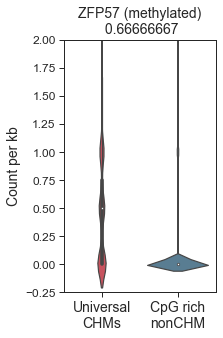

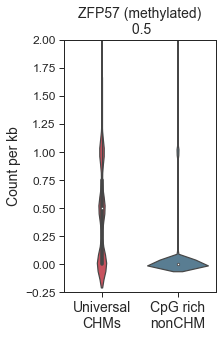

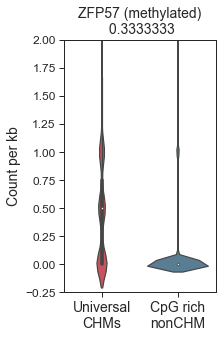

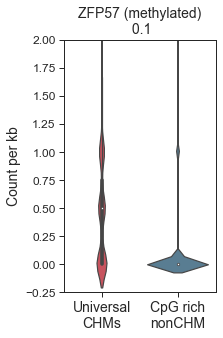

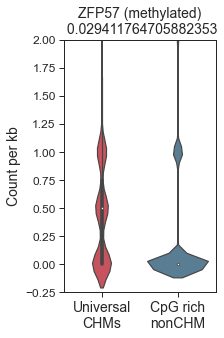

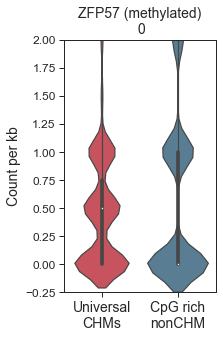

In [117]:
### not used
# for stage_fraction_thres in [0.66666667, 0.5, 0.3333333, 0.1, 1/34, 0] :
# for stage_fraction_thres in [0.66666667] :
    
    meth_ratio_df['meth_ratio_ov0p5'] = (meth_ratio_df['meth_ratio'] >= 0.5).astype(int)
    meth_zfp57 = meth_ratio_df[['motif_num', 'name_num', 'meth_ratio_ov0p5']].groupby(['motif_num', 'name_num']).mean().reset_index()
    meth_zfp57['if_meth'] = (meth_zfp57['meth_ratio_ov0p5'] >= stage_fraction_thres).astype(int)
    meth_zfp57['name'] = meth_zfp57['name_num'].str.split('_', expand = True)[0]
#     meth_zfp57['type_num'] = meth_zfp57['name_num'].str.split('_', expand = True)[1].astype(int)
#     meth_zfp57 = meth_zfp57.sort_values(['name', 'type_num'])
    
    total_region1kb_meth_zfp57 = pd.merge(meth_zfp57, type_num_total_df, on = "name_num", how = 'right')[['name_num', 'if_meth']].fillna(0)
    total_region1kb_meth_zfp57 = total_region1kb_meth_zfp57.groupby('name_num').sum().reset_index()
    total_region1kb_meth_zfp57['name_num1'] = [x.split('.')[1] if "." in x else x for x in total_region1kb_meth_zfp57['name_num'].to_list()]
    total_region1kb_meth_zfp57 = total_region1kb_meth_zfp57.groupby('name_num1').mean().reset_index()
    total_region1kb_meth_zfp57['name'] = total_region1kb_meth_zfp57['name_num1'].str.split('_', expand = True)[0]
    
    with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
        }), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 14,
                             'xtick.labelsize': 14,
                             'ytick.labelsize': 12,
                             'legend.fontsize': 10
                         }):
        fig, axes = plt.subplots(figsize = (6.4 * .5, 4.8 * 1), tight_layout = True)
        ax = axes
        sns.violinplot(data = total_region1kb_meth_zfp57,
                       x = 'name',
                       y = 'if_meth',
                       ax = ax,
                       palette = ['#DA404E', '#507F9B'],
#                        showfliers = False,
#                        width = .618
                      )
        ax.set_xticks([0,1])
        ax.set_xticklabels(['Universal\nCHMs', 'CpG rich\nnonCHM'])
        ax.set_title(f'ZFP57 (methylated)\n {stage_fraction_thres}')
        ax.set_ylabel("Count per kb")
        ax.set_xlabel("")
        ax.set_ylim(-.25,2)

#         fig.savefig(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make10_box_ZFP57meth_freq_1kbAdd_{stage_fraction_thres}.pdf', transparent = True)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Universal v.s. nonCHM: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=3.454e+07
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Universal v.s. nonCHM: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=3.439e+07
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Universal v.s. nonCHM: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=3.428e+07
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
**

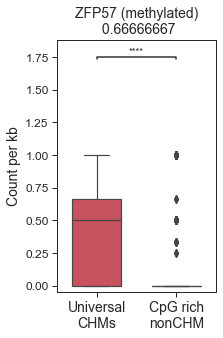

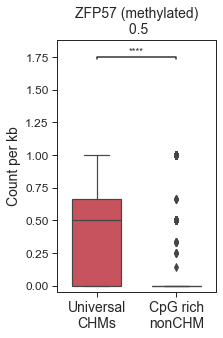

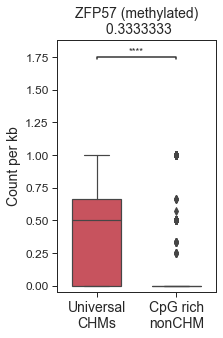

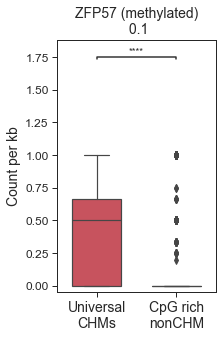

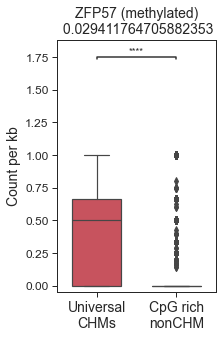

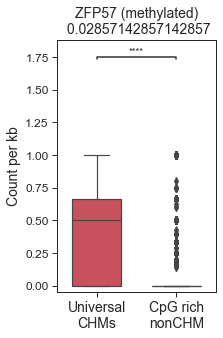

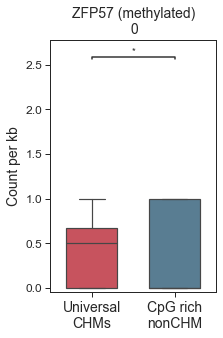

In [126]:
from statannot import add_stat_annotation

total_region1kb_meth_zfp57 = {}
for stage_fraction_thres in [0.66666667, 0.5, 0.3333333, 0.1, 1/34, 1/35, 0] :
 
    meth_ratio_df['meth_ratio_ov0p5'] = (meth_ratio_df['meth_ratio'] >= 0.5).astype(int)
    meth_zfp57 = meth_ratio_df[['motif_num', 'name_num', 'meth_ratio_ov0p5']].groupby(['motif_num', 'name_num']).mean().reset_index()
    meth_zfp57['if_meth'] = (meth_zfp57['meth_ratio_ov0p5'] >= stage_fraction_thres).astype(int)
    meth_zfp57['name'] = meth_zfp57['name_num'].str.split('_', expand = True)[0]
#     meth_zfp57['type_num'] = meth_zfp57['name_num'].str.split('_', expand = True)[1].astype(int)
#     meth_zfp57 = meth_zfp57.sort_values(['name', 'type_num'])
    
    total_region1kb_meth_zfp57[stage_fraction_thres] = pd.merge(meth_zfp57, type_num_total_df, on = "name_num", how = 'right')[['name_num', 'if_meth']].fillna(0)
    total_region1kb_meth_zfp57[stage_fraction_thres]['name_num1'] = [x.split('.')[1] if "." in x else x for x in total_region1kb_meth_zfp57[stage_fraction_thres]['name_num'].to_list()]
    total_region1kb_meth_zfp57[stage_fraction_thres] = total_region1kb_meth_zfp57[stage_fraction_thres].groupby('name_num1').mean().reset_index()
    total_region1kb_meth_zfp57[stage_fraction_thres]['name'] = total_region1kb_meth_zfp57[stage_fraction_thres]['name_num1'].str.split('_', expand = True)[0]
     
    with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
        }), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 14,
                             'xtick.labelsize': 14,
                             'ytick.labelsize': 12,
                             'legend.fontsize': 10
                         }):
        fig, axes = plt.subplots(figsize = (6.4 * .5, 4.8 * 1), tight_layout = True)
        ax = axes
        sns.boxplot(data = total_region1kb_meth_zfp57[stage_fraction_thres],
                       x = 'name',
                       y = 'if_meth',
                       ax = ax,
                       palette = ['#DA404E', '#507F9B'],
#                        showfliers = False,
                       width = .618
                      )
        ax.set_title(f'ZFP57 (methylated)\n {stage_fraction_thres}')
        ax.set_ylabel("Count per kb")
        ax.set_xlabel("")
        add_stat_annotation(ax, data=total_region1kb_meth_zfp57[stage_fraction_thres], x='name', y='if_meth',
                    box_pairs=[('Universal', 'nonCHM')],
#                     box_pairs=[(0, 1)],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
        ax.set_xticks([0,1])
        ax.set_xticklabels(['Universal\nCHMs', 'CpG rich\nnonCHM'])

#         ax.set_ylim(0,1)

        fig.savefig(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make10_box_ZFP57meth_freq_1kbAdd_{stage_fraction_thres}_universalComplement.pdf', transparent = True)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Universal v.s. nonCHM: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=3.454e+07
UniversalComplement v.s. nonCHM: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=2.709e+07
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Universal v.s. nonCHM: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=3.439e+07
UniversalComplement v.s. nonCHM: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=2.720e+07
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Univ

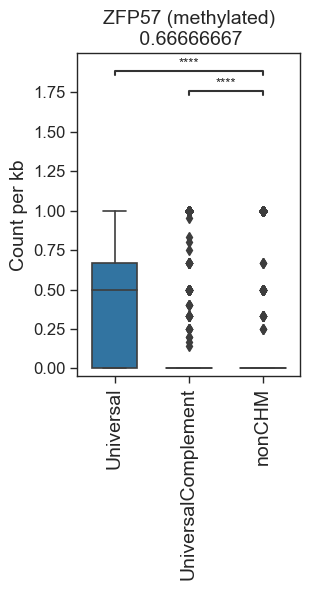

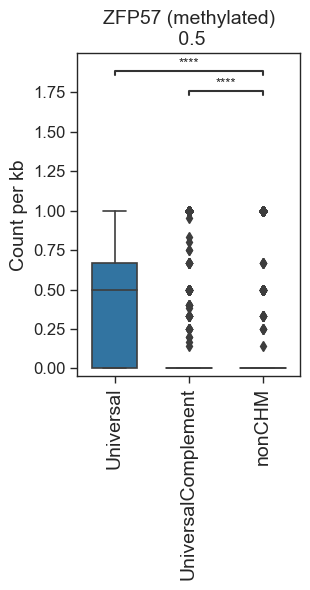

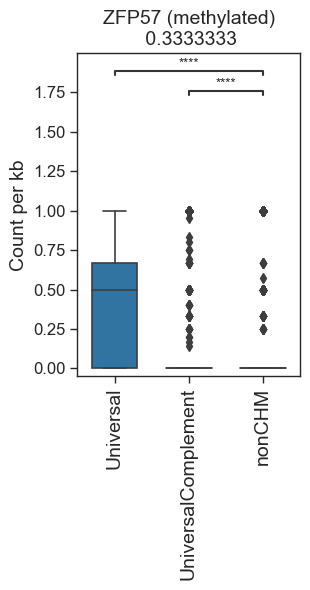

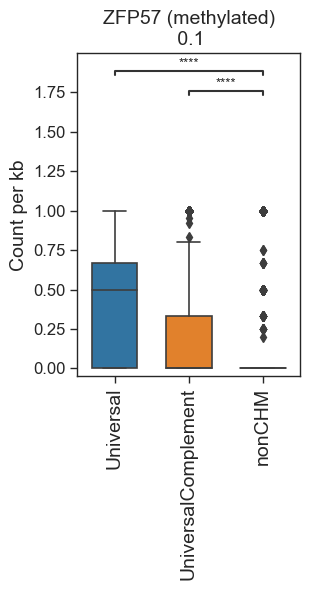

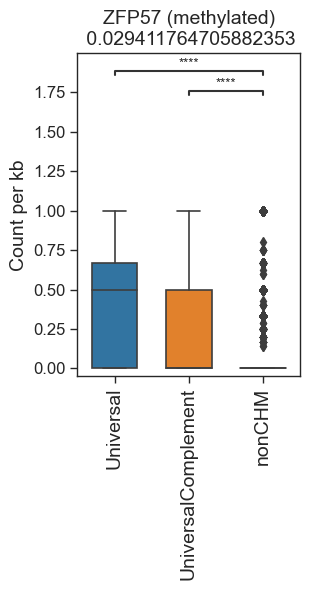

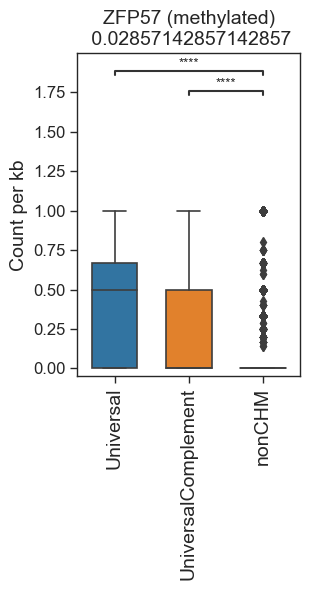

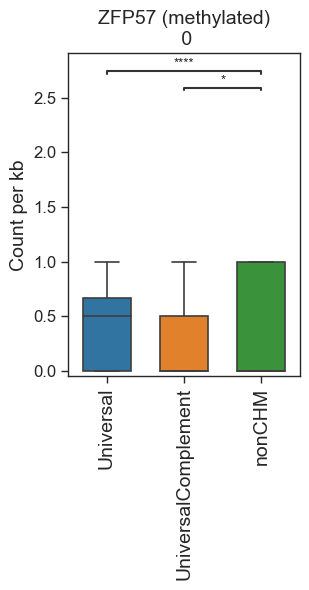

In [20]:
from statannot import add_stat_annotation

total_region1kb_meth_zfp57 = {}
for stage_fraction_thres in [0.66666667, 0.5, 0.3333333, 0.1, 1/34, 1/35, 0] :
 
    meth_ratio_df['meth_ratio_ov0p5'] = (meth_ratio_df['meth_ratio'] >= 0.5).astype(int)
    meth_zfp57 = meth_ratio_df[['motif_num', 'name_num', 'meth_ratio_ov0p5']].groupby(['motif_num', 'name_num']).mean().reset_index()
    meth_zfp57['if_meth'] = (meth_zfp57['meth_ratio_ov0p5'] >= stage_fraction_thres).astype(int)
    meth_zfp57['name'] = meth_zfp57['name_num'].str.split('_', expand = True)[0]
#     meth_zfp57['type_num'] = meth_zfp57['name_num'].str.split('_', expand = True)[1].astype(int)
#     meth_zfp57 = meth_zfp57.sort_values(['name', 'type_num'])
    
    total_region1kb_meth_zfp57[stage_fraction_thres] = pd.merge(meth_zfp57, type_num_total_df, on = "name_num", how = 'right')[['name_num', 'if_meth']].fillna(0)
    total_region1kb_meth_zfp57[stage_fraction_thres]['name_num1'] = [x.split('.')[1] if "." in x else x for x in total_region1kb_meth_zfp57[stage_fraction_thres]['name_num'].to_list()]
    total_region1kb_meth_zfp57[stage_fraction_thres] = total_region1kb_meth_zfp57[stage_fraction_thres].groupby('name_num1').mean().reset_index()
    total_region1kb_meth_zfp57[stage_fraction_thres]['name'] = total_region1kb_meth_zfp57[stage_fraction_thres]['name_num1'].str.split('_', expand = True)[0]
     
    with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
        }), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 14,
                             'xtick.labelsize': 14,
                             'ytick.labelsize': 12,
                             'legend.fontsize': 10
                         }):
        fig, axes = plt.subplots(figsize = (6.4 * .5, 4.8 * 1.25), tight_layout = True)
        ax = axes
        sns.boxplot(data = total_region1kb_meth_zfp57[stage_fraction_thres],
                       x = 'name',
                       y = 'if_meth',
                       ax = ax,
                       order = ['Universal', 'UniversalComplement', 'nonCHM'],
                    #    palette = ['#DA404E', '#507F9B'],
#                        showfliers = False,
                       width = .618
                      )
        ax.set_title(f'ZFP57 (methylated)\n {stage_fraction_thres}')
        ax.set_ylabel("Count per kb")
        ax.set_xlabel("")
        add_stat_annotation(ax, data=total_region1kb_meth_zfp57[stage_fraction_thres], x='name', y='if_meth',
                    box_pairs=[(x, 'nonCHM') for x in ['Universal', 'UniversalComplement']],
#                     box_pairs=[(0, 1)],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
        # ax.set_xticklabels(['Universal\nCHMs', 'CpG rich\nnonCHM'])

#         ax.set_ylim(0,1)

        fig.savefig(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make10_box_ZFP57meth_freq_1kbAdd_{stage_fraction_thres}_unviersalComplementNonCHM.pdf', transparent = True)


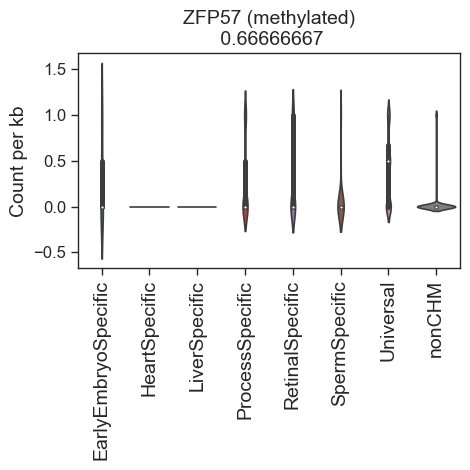

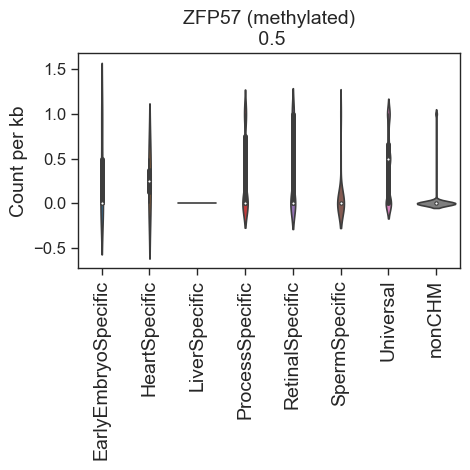

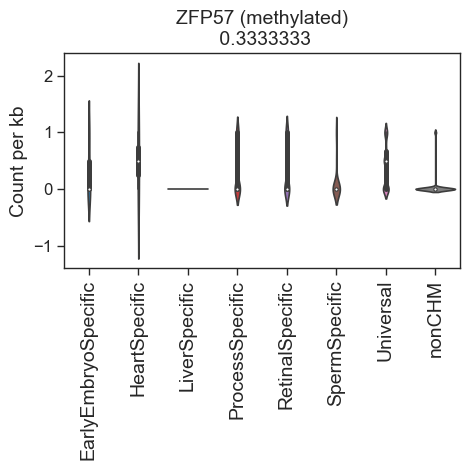

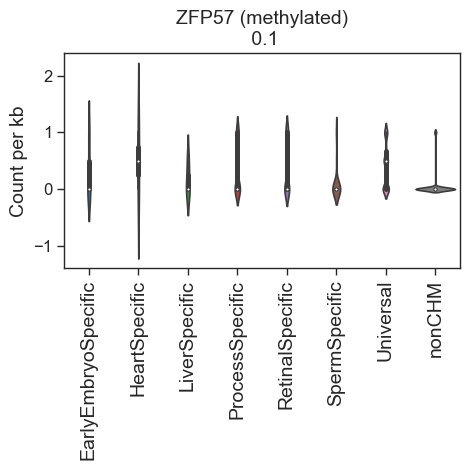

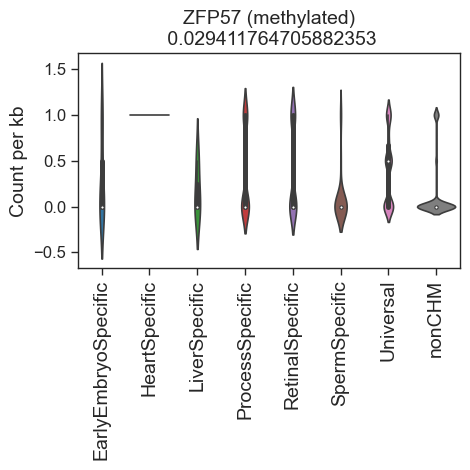

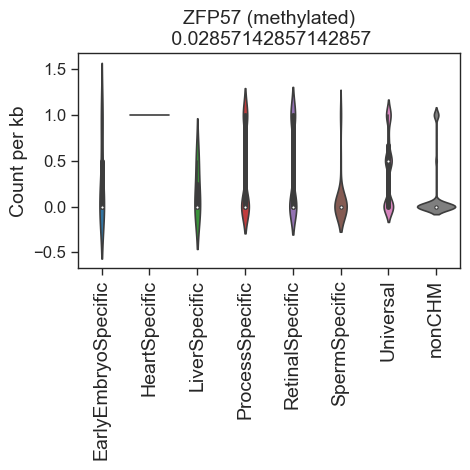

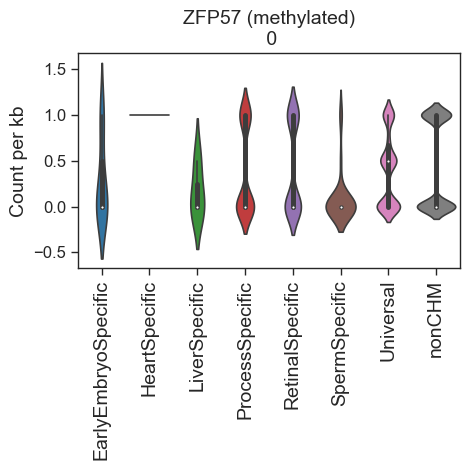

In [19]:
### not used

# from statannot import add_stat_annotation

# total_region1kb_meth_zfp57 = {}
# for stage_fraction_thres in [0.66666667, 0.5, 0.3333333, 0.1, 1/34, 1/35, 0] :
 
#     meth_ratio_df['meth_ratio_ov0p5'] = (meth_ratio_df['meth_ratio'] >= 0.5).astype(int)
#     meth_zfp57 = meth_ratio_df[['motif_num', 'name_num', 'meth_ratio_ov0p5']].groupby(['motif_num', 'name_num']).mean().reset_index()
#     meth_zfp57['if_meth'] = (meth_zfp57['meth_ratio_ov0p5'] >= stage_fraction_thres).astype(int)
#     meth_zfp57['name'] = meth_zfp57['name_num'].str.split('_', expand = True)[0]
# #     meth_zfp57['type_num'] = meth_zfp57['name_num'].str.split('_', expand = True)[1].astype(int)
# #     meth_zfp57 = meth_zfp57.sort_values(['name', 'type_num'])
    
#     total_region1kb_meth_zfp57[stage_fraction_thres] = pd.merge(meth_zfp57, type_num_total_df, on = "name_num", how = 'right')[['name_num', 'if_meth']].fillna(0)
#     total_region1kb_meth_zfp57[stage_fraction_thres]['name_num1'] = [x.split('.')[1] if "." in x else x for x in total_region1kb_meth_zfp57[stage_fraction_thres]['name_num'].to_list()]
#     total_region1kb_meth_zfp57[stage_fraction_thres] = total_region1kb_meth_zfp57[stage_fraction_thres].groupby('name_num1').mean().reset_index()
#     total_region1kb_meth_zfp57[stage_fraction_thres]['name'] = total_region1kb_meth_zfp57[stage_fraction_thres]['name_num1'].str.split('_', expand = True)[0]
     
#     with sns.axes_style('white', rc={
#         'xtick.bottom': True,
#         'ytick.left': True
#         }), sns.plotting_context('paper',
#                          rc={
#                              'axes.titlesize': 14,
#                              'axes.labelsize': 14,
#                              'xtick.labelsize': 14,
#                              'ytick.labelsize': 12,
#                              'legend.fontsize': 10
#                          }):
#         fig, axes = plt.subplots(figsize = (6.4 * .75, 4.8 * 1), tight_layout = True)
#         ax = axes
#         sns.violinplot(data = total_region1kb_meth_zfp57[stage_fraction_thres],
#                        x = 'name',
#                        y = 'if_meth',
#                        ax = ax,
#                     #    palette = ['#DA404E', '#507F9B'],
# #                        showfliers = False,
#                     #    width = .618
#                       )
#         ax.set_title(f'ZFP57 (methylated)\n {stage_fraction_thres}')
#         ax.set_ylabel("Count per kb")
#         ax.set_xlabel("")
# #         add_stat_annotation(ax, data=total_region1kb_meth_zfp57[stage_fraction_thres], x='name', y='if_meth',
# #                     box_pairs=[('Universal', 'nonCHM')],
# # #                     box_pairs=[(0, 1)],
# #                     test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
#         ax.set_xticks(ax.get_xticks())
#         ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
#         # ax.set_xticklabels(['Universal\nCHMs', 'CpG rich\nnonCHM'])

# #         ax.set_ylim(0,1)

#         fig.savefig(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make10_violin_ZFP57meth_freq_1kbAdd_{stage_fraction_thres}_unviersalProcessSpecificNonCHM.pdf', transparent = True)


In [25]:
total_region1kb_meth_zfp57[0.66666667]

,name_num1,if_meth,name
0,EarlyEmbryoSpecific_1221,0.0,EarlyEmbryoSpecific
1,EarlyEmbryoSpecific_1222,0.0,EarlyEmbryoSpecific
2,EarlyEmbryoSpecific_63,0.0,EarlyEmbryoSpecific
3,EarlyEmbryoSpecific_726,0.0,EarlyEmbryoSpecific
4,EarlyEmbryoSpecific_903,0.0,EarlyEmbryoSpecific
...,...,...,...
24773,nonCHM_9995,0.0,nonCHM
24774,nonCHM_9996,0.0,nonCHM
24775,nonCHM_9997,0.0,nonCHM
24776,nonCHM_9998,0.0,nonCHM


In [21]:
total_region1kb_meth_zfp57[0.66666667].to_csv(
    # '/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Sequence/ZFP57Frequency_1kb/methCpG/ZFP57methMotif_countPerKb_2of3.tsv',
    # '/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Sequence/ZFP57Frequency_1kb/methCpG/ZFP57methMotif_countPerKb_2of3_universalProcessSpecificNonCHM.tsv',
    '/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Sequence/ZFP57Frequency_1kb/methCpG/ZFP57methMotif_countPerKb_2of3_universalComplementNonCHM.tsv',
    sep = "\t", header = True, index = False
                                            )
total_region1kb_meth_zfp57[0.66666667]

,name_num1,if_meth,name
0,UniversalComplement_10,0.0,UniversalComplement
1,UniversalComplement_10048,0.0,UniversalComplement
2,UniversalComplement_1005,0.0,UniversalComplement
3,UniversalComplement_10050,0.0,UniversalComplement
4,UniversalComplement_10056,0.0,UniversalComplement
...,...,...,...
26159,nonCHM_9995,0.0,nonCHM
26160,nonCHM_9996,0.0,nonCHM
26161,nonCHM_9997,0.0,nonCHM
26162,nonCHM_9998,0.0,nonCHM
